<h1>Automated correction factors calculation from smFRET data</h1>

This notebook contains scripts to automatically calculate the correction factors for TIRF-based smFRET data and apply those corrections to the dataset

In [1]:
#Import necessary packages
import xarray as xr             #For data retreival and processing
import matplotlib.pyplot as plt #For plotting
import numpy as np              #For processing arrays
import glob, os                 #For folder search


In [2]:
def total_mean_int(root_path, frames=[0,13]):
    # root_path = r'E:\Data\02 FRETFluc\20230217_138p_7N_3N_R1P_Cy3_Fluo\ch_138p_R1P_Cy3_500ms'
    nc_list = glob.glob(root_path)
    fr1,fr2 = frames    #Number of frames to extract
    ds = []             #Array to store individual .nc datasets (necessary??)
    donor_intensity = []    #Array to store donor intensities from datasets
    acceptor_intensity = [] #Array to store acceptor intensities from datasets
    #acceptor_excitation = []    #Array to store acceptor intensities (from acceptor excitation) from datasets (not used currently)

    #Loop through all .nc files and extract donor and acceptor intensities
    for fname in nc_list:
        nc_fname = os.path.join(root_path, fname)
        # nc_fname = os.path.join(root_path, f'*.nc')
        tmp_ds = xr.open_dataset(nc_fname, engine='h5netcdf')
        ds.append(tmp_ds)
        donor_intensity.append(tmp_ds.intensity[:,0].isel(frame=slice(fr1,fr2)).mean("frame"))
        acceptor_intensity.append(tmp_ds.intensity[:,1].isel(frame=slice(fr1,fr2)).mean("frame"))
        # acceptor_excitation.append(tmp_ds.intensity[:,1,1::2].isel(frame=slice(fr1,fr2)).mean("frame"))

    d_int = []
    a_int = []
    # a_exc = []
    #Rewrite this part using numpy's function -- flattening the array
    for i in range(len(donor_intensity)):
        d_int = np.concatenate((donor_intensity[i],d_int))
        a_int = np.concatenate((acceptor_intensity[i],a_int))
        # a_exc = np.concatenate((acceptor_excitation[i],a_exc))
    return d_int, a_int

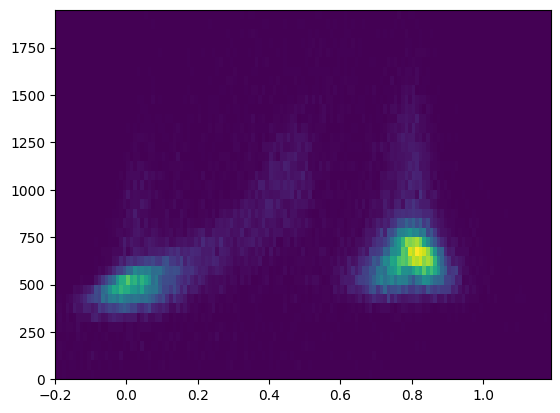

In [3]:

#Import folder with .nc files (excluding background correction files)
donor_int, acceptor_int = total_mean_int(r'C:\JupyterNotebooks\datasets\*[!corrections].nc')

#Bins for intensity and FRET efficiency
bins_i = np.arange(0, 2000, 50)     #For TIR-S, 0-2000 is reasonable -- change it for other microscopes
bins_f = np.arange(-0.2,1.2,0.01)   #FRET efficiency spanning 0 to 1, but padded by 0.2 on either end

#Calculate total intensity and FRET efficiency for the dataset
total_intensity = donor_int + acceptor_int
fret = acceptor_int / (total_intensity)

#Plot 2D-histogram of Total Intensity v/s FRET Efficiency
plt.hist2d(fret, total_intensity, bins=[bins_f,bins_i])
plt.show()